# PHY1024 - Introduction to Python Programming, week 4

The lecture materials, worksheets, and assignments can all be found here:

http://go.qub.ac.uk/phy1024y2016


## Lecture materials

Note: the computer labs sessions are mandatory also in weeks where there is no new assignment. Attendance sheets will be provided for the computer labs which need to be signed by each student either on a Thursday session or a Friday session.

### Goodness of fit

In the last few weeks we have successfully modelled a physical system using Monte Carlo simulations. In those situations we created pseudo-random data with an algorithm and looked at properties like the scatter (standard deviation) of the results.

This week we look at data from experiements and how we can fit a model to those data sets.

You have done some of that already with a least squares fit to a straight line in C, and also with using weighted least squares when your data points have error bars.

We will now use a more general concept that is not dependent on the actual relationship we are fitting (i.e. it does not only work for straight lines).

This concept is called the "goodness of fit". 

Here's a visual example of what that means (ignore the code for now):

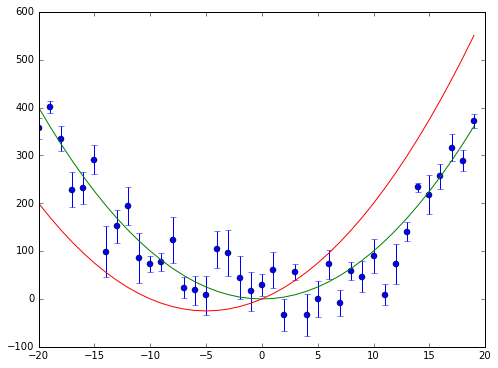

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# the next line is only for ipython notebooks:
%matplotlib inline

x = np.arange(-20, 20)
np.random.seed(123)
y = x**2 + np.random.normal(0, 40, len(x))
yerror = np.random.normal(30, 10, len(x))

plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerror, fmt='o')

# a line that is a pretty good fit:
y_1 = x**2
# a line that is a pretty bad fit:
y_2 = x**2 + 10*x
plt.plot(x, y_1)
plt.plot(x, y_2)

The green line is a pretty good fit to the data, the red one not so much.

But of course we want a some quantitative way of measuring which one of the lines is the better fit to the data.

You have encountered this briefly in the previous C lectures; a useful quantity to encapsulate the goodness of fit is the **chi-squared** statistic. It is basically a measure for the distance of the data points to the fit, divided by the error bar of the data points.

Say we have our $N$ measurements $y_1, y_2, ... y_N$, which all have an individual error of $\sigma_1, \sigma_2, ..., \sigma_N$. Say we have chosen a function $f(x)$ which we use to describe the data, and we want to calculate how well this function describes the data.

Then the chi-squared statistic is calculated like this:

## $\chi^2 = \Sigma \frac{(y_i - f(x_i))^2}{\sigma^2_i}$

For the two examples from above, the green line and the red line, we indeed get very different chi-squared values:

In [13]:
chi_1 = ((y - y_1)**2/yerror**2).sum()
# Note how clever Python is:
# We calculate here one array minus another array, square it, divide by a third array,
# and then sum it all up. All without loops!

chi_2 = ((y - y_2)**2/yerror**2).sum()

print 'Chi-squared for green line: ', chi_1
print 'Chi-squared for red line: ', chi_2


Chi-squared for green line:  119.211464997
Chi-squared for red line:  1372.08941434


Note that the chi-squared value depends on how good our measurements are, i.e. how big our error bars are. One can get a very small (i.e. good) chi-squared value if one has very large error bars.

Let's say we double the error bars from the previous data set, because we repeated the measurements, but with very bad equipment:

Chi-squared for green line:  29.8028662494
Chi-squared for red line:  343.022353585


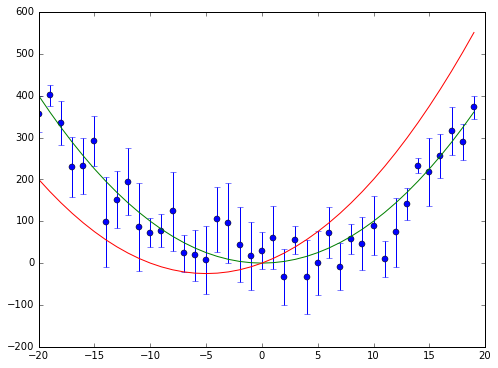

In [3]:
yerror_new = 2 * yerror

plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerror_new, fmt='o')

y_2 = x**2 + 10*x
plt.plot(x, y_1)
plt.plot(x, y_2)

chi_1_new = ((y - y_1)**2/yerror_new**2).sum()
chi_2_new = ((y - y_2)**2/yerror_new**2).sum()

print 'Chi-squared for green line: ', chi_1_new
print 'Chi-squared for red line: ', chi_2_new


Let's see mathematically how the dependence is:

In the first case, let's call that "case A", we had: 

## $\chi_A^2 = \Sigma \frac{(y_i - f(x_i))^2}{\sigma^2_i}$

And in the case with the twice as large errors, let's call that "case B", we have:

## $\chi_B^2 = \Sigma \frac{(y_i - f(x_i))^2}{(2\sigma)^2_i} = \Sigma \frac{(y_i - f(x_i))^2}{4\sigma^2_i} = \frac{1}{4}\Sigma \frac{(y_i - f(x_i))^2}{\sigma^2_i} = \frac{1}{4}\chi_A^2$


So a very good chi-square can mean a very good fit, or very bad data quality! We will talk about how to distinguish between those cases next week.

There are fancy algorithms to find the fit with the smallest chi-squared statistic quite fast, and we will also look at some of them next week.

This week, however, we just do it in a really straightforward way by stepping through the parameter space - this is what you will do in the computer labs this week (if you have finished working on ther Assignments already).

We will look at a real astrophysical example for this:

### Exoplanet transits

Exoplanets are planets outside our own solar system. They are very hard to see directly, because they are very dim objects in the sky and, if the star-planet system is rather far away, out telescopes cannot resolve the distance between the star and the planet. But we can detect them indirectly; A very popular method to do so is by so-called transits. 

A transit occurs when a planet crosses in front of its host star in our line of sight. This obviously doesn't happen for all exoplanets out there, because only a small frcation of them is aligned in space in such a manner that they pass between us and their host star.

Image credit: LCOGT


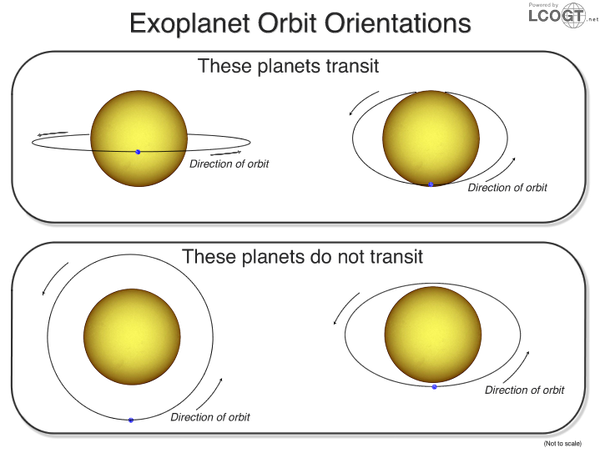

In [10]:
from IPython.display import Image
print 'Image credit: LCOGT'
Image(filename='TransitOrNot_LCOGT.png', width=600) 

If a transit happens, what we actually can observe is that the host star seems to become dimmer, because the exoplanet is blocking some of the light from the star:

Image credit: NASA


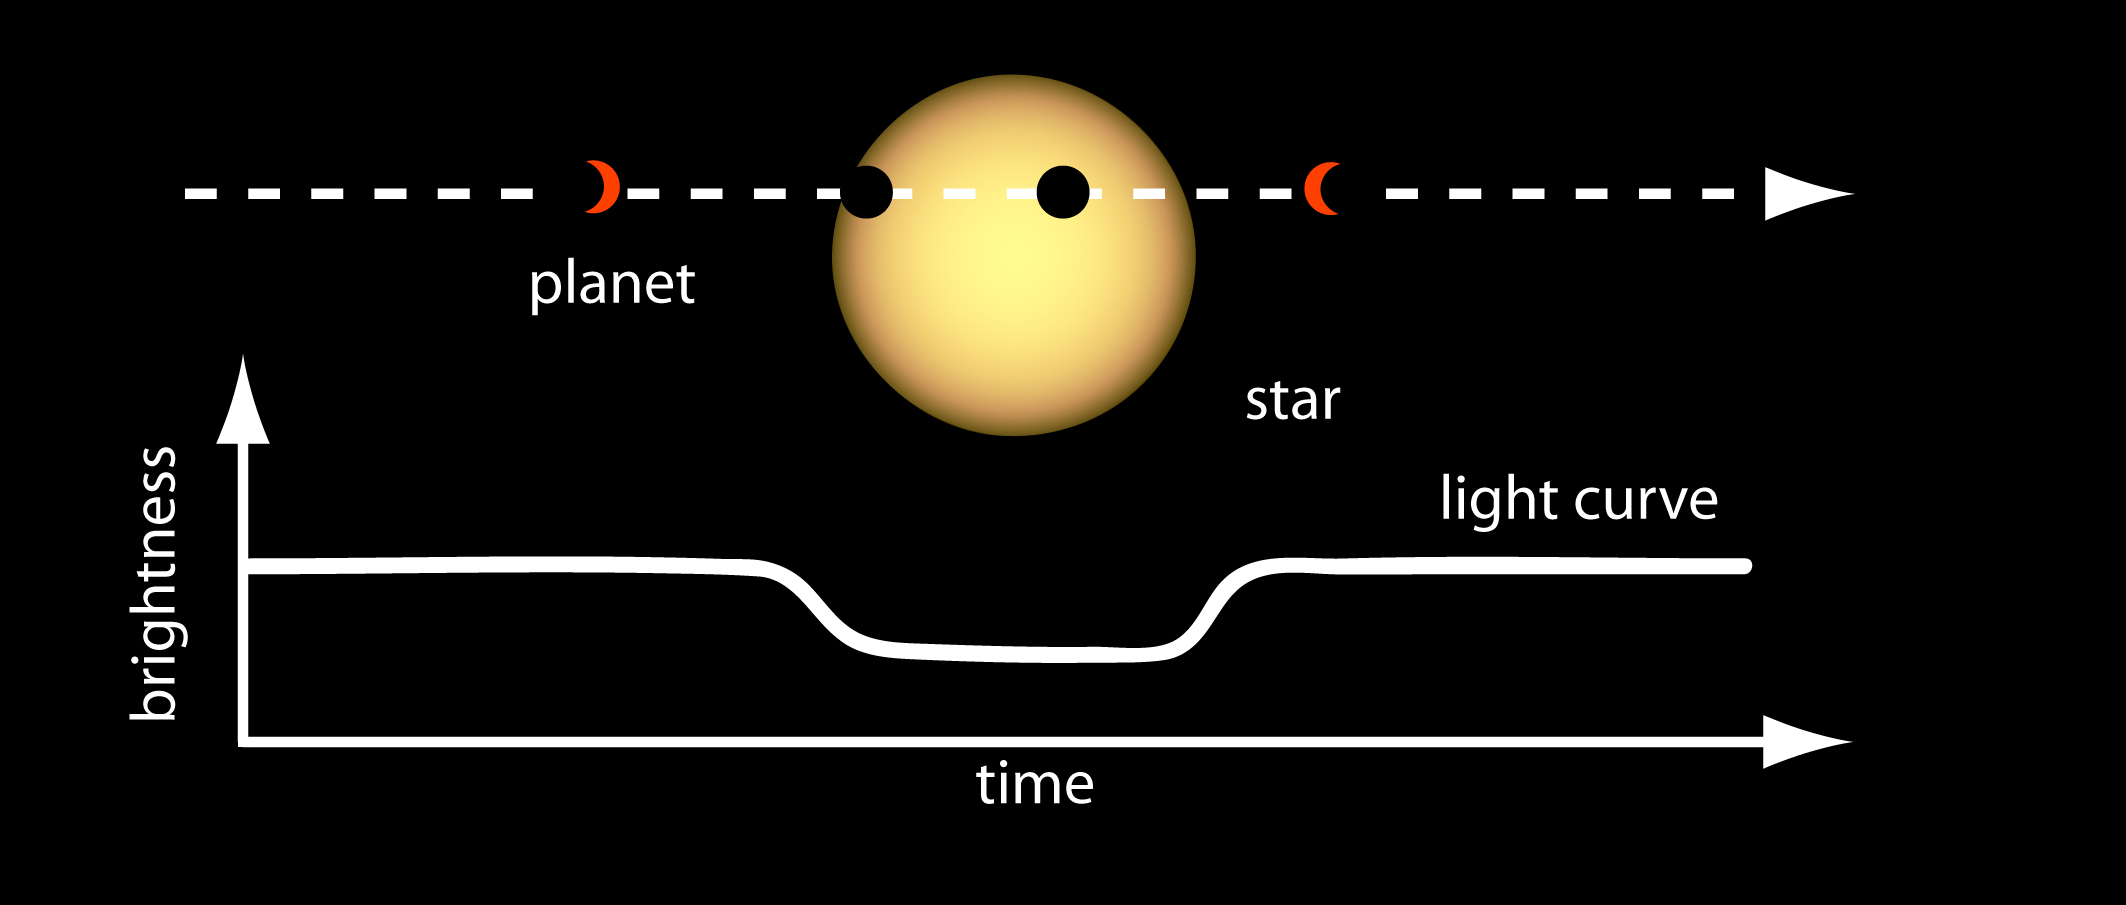

In [9]:
print 'Image credit: NASA'
Image(filename='transit_NASA_blackbg.jpg', width=800) 

We call the brightness of an object, plotted as a function of time, a light curve. 

We can use the properties of such a transit light curve to infer almost all relevant pieces of information about the star-planet system. (One single piece of information will be missing and needs to be determined from a different observational technique, and we'll see what that is in a moment.)

Three things are quite easily measurable form the light curve:

1) The reduction in flux during the transit (the depth of the dip in the light curve).

How deep is the dip in the light curve that is caused by the transit of the exoplanet?

It must be proportional to the area on the stellar surface that is blocked out by the area of the planet.

We can write that as a function of the planetary radius and the stellar radius:

flux reduction $\Delta F$ = depth of dip = area of planet / area of star = 

## $\frac{\pi\,r^2_{planet}}{\pi\,r^2_{\ast}} = \frac{r^2_{planet}}{r^2_{\ast}}$

2) The transit of an exoplanet happens once in an orbital period. In the example of our own Earth and Sun, an alien observer would be able to see the Earth's transit once per 365 days. 

Image credit: Jodrell Bank Telescope Center


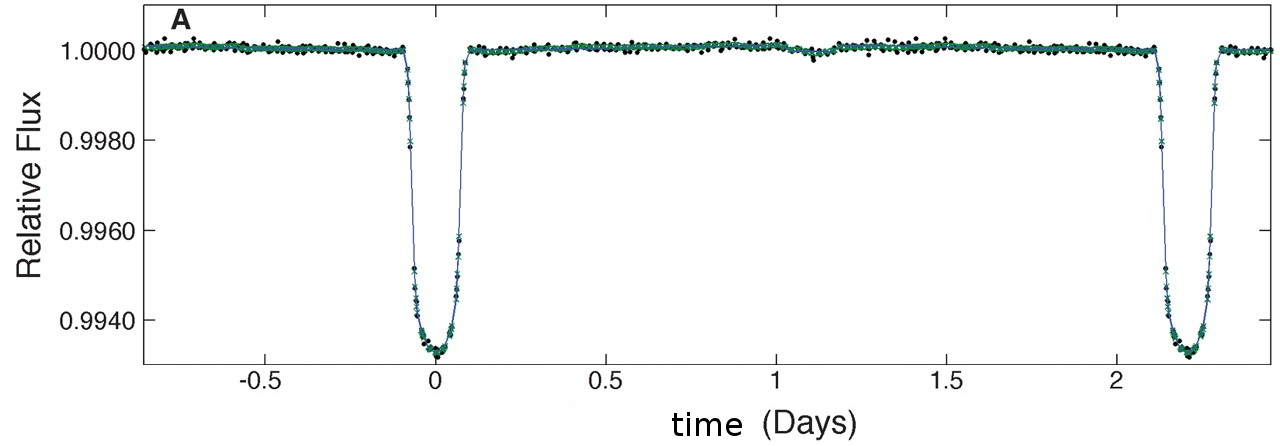

In [12]:
print 'Image credit: Jodrell Bank Telescope Center'
Image(filename='RecurringTransit_JodrellBankDiscoveryCentre.jpg', width=800) 

In this example, the time between one transit and the next is ca. 2.2 days. That's a fairly short orbital period; the shortest we have in our own solar system is the one of Mercury, and that is ca. 88 days.

Planets that orbit close to their host star have shorter orbital periods, while ones in wider orbits have longer periods. We won't get into that in detail, but the exact relationship is called Kepler's third law. It connects the distance from the star to the planet, called semimajor axis $a$, the orbital period of the planet $P$, and the mass of the host star $M_\ast$. (The mass of the star comes into this because if it's a very heavy star, the gravitational pull from the star is stronger and the planet will have to orbit fastert to avoid falling into the star.)

In short, this will give us:

## $M_\ast = \frac{a^3}{P^2}$


3) Finally, we also can get information from the duration of the transit, i.e. how long the dip lasts. This is a fairly complicated relationship that involves the radius of the star, the radius of the planet, the speed of the planet on its orbit, and it gets even more tricky because the planet does not necessarily transit across the center of the star:

Image credit: Seager & Mallen-Ornelas (2003)


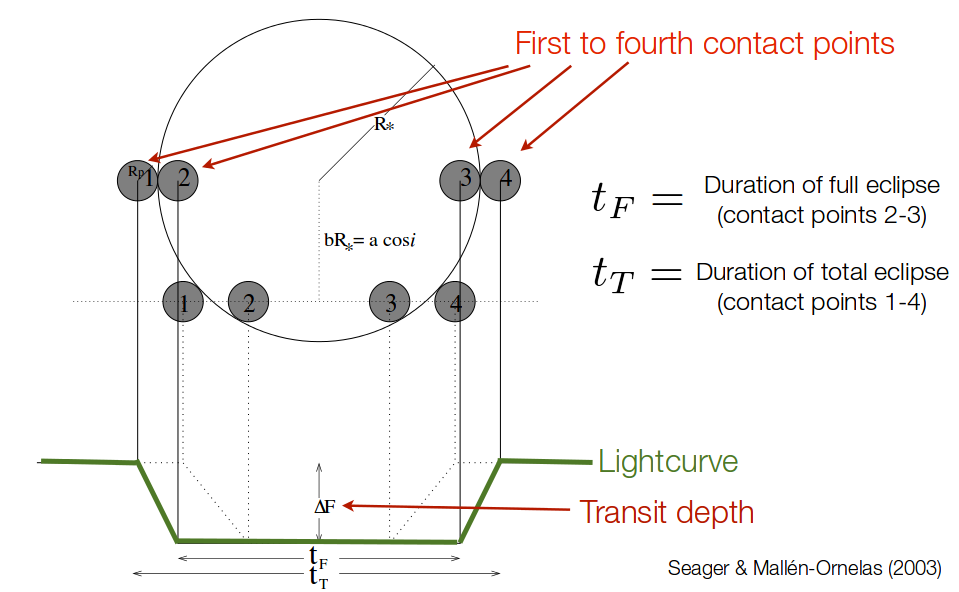

In [15]:
print 'Image credit: Seager & Mallen-Ornelas (2003)'
Image(filename='TransitDuration_Seager_MallenOrnelas.png', width=800) 

Long story short, all of those measurements will give us things like the semimajor axis of the planetary orbit, the ratio of the planet radius to the stellar radius, and the mass of the host star. The only thing that we cannot get from transit measurements is the **mass** of the exoplanet, it cancels out of all equations we can use to describe the transit light curve.

This is why exoplanet transit observations need to be complemented by another observational technique, called *radial velocity*, to measure the mass of the planet (technically, the ratio of the planetary to the stellar mass).


What we will deal with in the computer labs is a transit-related phenomenen that is called:

### Transit-timing variations

This is a phenomenon that is not quite obvious at first sight, so it took astronomers more than ten years after the first transiting exoplanet was found to figure out that transit timing variations are a measurable thing for exoplanets. Fortunately, they are very easy to fit computationally, as we will see in the computer labs.

Here's how transit timing variations work: If there are several planets in a solar system (like for our own solar system), the planets gravitationally pull at each other. This can cause the planets to be a bit late (or early) on certain parts of their orbit, depending on where the other planets are at that moment.

This means that *observed transits* will be a bit early or a bit late!



Image credit: K. Poppenhaeger


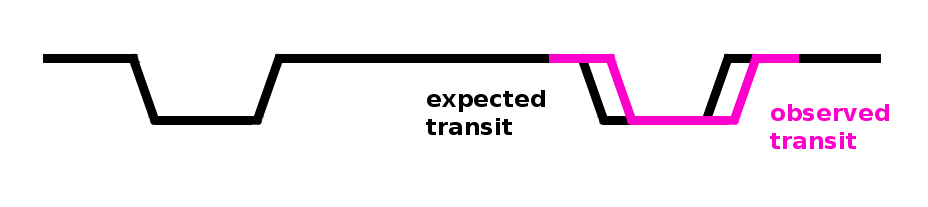

In [17]:
print 'Image credit: K. Poppenhaeger'
Image(filename='TTV_KP.png', width=800) 

In our solar system, the other planets cause Mercury to be about 50 seconds late or early with its transit, depending on the position of the other planets.

When we have a basically unknown exoplanetary system and know only of one planet, we can search for these **transit-timing variations** to infer that there must be more than one planet in the system, even if we haven't seen the transit of the other planet(s) yet.

Here's what you wil look at in the computer labs this week:

Say we have an exoplanet system and we expect that the transit dip in the light curve occurs at the time indicated by the blue line (we use a simplified transit shape that is just rectangular). But what you actually observe is the red data points. You can infer that there is another planet gravitationally pulling on the planet whose transit you are observing.

<Container object of 3 artists>

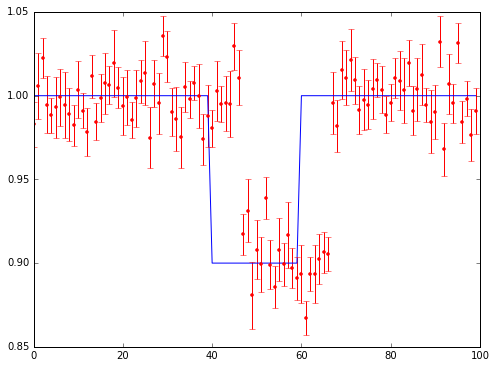

In [5]:
t = np.arange(0, 100)
transit_expected = np.ones(len(t))
transit_expected[40:60] = 0.9

measurements = np.ones(len(t))
measurements[47:67] = 0.9
np.random.seed(111)
measurements = measurements + np.random.normal(0, 0.015, len(t))
errors = 0.01 + np.random.uniform(0, 0.01, len(t))

plt.figure(figsize=(8,6))
plt.plot(t, transit_expected)
plt.errorbar(t, measurements, errors, fmt='r.')

Your goal for the computer labs this week is to calculate the chi-squared statistics for different transit models (with different start times of the transit) and find out which one is the best-fitting model. This will tell you how much time difference there is between the expected transit and the actually observed transit.

In real life, astronomers use time series of such measurements to figure out what the mass of the unseen planet (that gravitationally pulls on the transiting planet) must be.